In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [227]:
df = pd.read_csv('cars_class.csv')
df.to_csv('xa1.csv')

In [228]:
df.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [229]:
df.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [231]:
df.shape

(719, 20)

<Axes: >

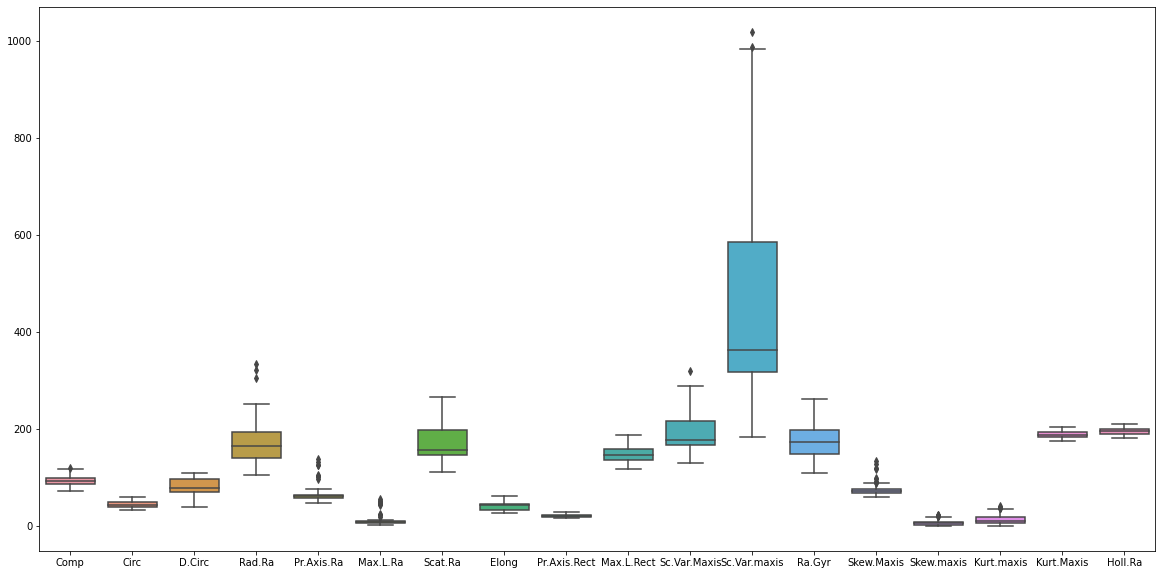

In [232]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.iloc[:,1:-1])

#Imputing the outlier and scalling

In [233]:
iqr = df.describe().copy()

In [234]:
iqr

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000


In [235]:
#IQR 
iqr = df.describe().copy()
xmin = iqr.loc['min']
xmax = iqr.loc['max']
q1 = iqr.loc['25%']
q3 = iqr.loc['75%']
iqr_th = ((q3-q1)*1.5)
min_iqr = (q1-iqr_th)
max_iqr = (q3+iqr_th)
min_OL = xmin<min_iqr
max_OL = xmax>max_iqr
# ol 
iqr=iqr.append([min_OL,max_OL])
iqr


<ipython-input-235-fcf26ca37f49>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iqr=iqr.append([min_OL,max_OL])


,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
count,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000,719.000000
mean,360.000000,93.435327,44.851182,81.723227,168.579972,61.847010,8.625869,168.137691,41.075104,20.531293,148.030598,188.168289,436.215577,174.726008,72.682893,6.343533,12.394993,188.798331,195.407510,1.470097
std,207.701709,8.111406,6.150286,15.528208,33.809172,8.259136,4.916908,32.937591,7.764459,2.560969,14.560092,31.235395,174.964977,32.149568,7.542055,4.856169,8.742511,6.048522,7.235166,1.126477
min,1.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000,0.000000
25%,180.500000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,68.000000,2.000000,5.500000,184.000000,190.000000,0.000000
50%,360.000000,93.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,362.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000,1.000000
75%,539.500000,99.000000,49.000000,96.000000,194.500000,65.000000,10.000000,197.500000,46.000000,23.000000,159.000000,216.000000,584.500000,198.000000,76.000000,9.000000,18.000000,193.000000,201.000000,2.000000
max,719.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000,3.000000
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000


Ther are some outlers, lets see their count and % then will take a call

In [236]:
iqr_res = pd.DataFrame(columns=['col','min_iqr', 'max_iqr','lt_iqr_cnt','lt_iqr_per', 'gt_iqr_cnt', 'gt_iqr_per','min_distance','max_distance'])
iqr=df.describe()
list_ol = []
for col in iqr.columns:
  xmin =  iqr.loc['min', col]
  xmax =  iqr.loc['max', col]
  xq1 = iqr.loc['25%', col]
  xq3 = iqr.loc['75%', col]
  xiqr_th = ((xq3-xq1)*1.5)
  min_iqr = (xq1-xiqr_th)
  max_iqr = (xq3+xiqr_th)
  lt_iqr_cnt = len(df[df[col] < min_iqr])
  gt_iqr_cnt = len(df[df[col] > max_iqr])
  xbase = df.shape[0]
  lt_iqr_per = round((lt_iqr_cnt/xbase)*100,2)
  gt_iqr_per = round((gt_iqr_cnt/xbase)*100,2)
  min_distance = str(round((min_iqr - xmin) / min_iqr,2))+'%' if lt_iqr_per > 0 else ""
  max_distance = str(round((xmax - max_iqr) / max_iqr,2))+'%' if gt_iqr_per > 0 else ""
  if (lt_iqr_cnt+gt_iqr_cnt)>0:
    row_dict = {'col':col,'lt_iqr_cnt':(str(lt_iqr_cnt)+'%'),'min_iqr':min_iqr,'max_iqr':max_iqr,'lt_iqr_per':lt_iqr_per,'gt_iqr_cnt':gt_iqr_cnt,'gt_iqr_per':str(gt_iqr_per)+'%','min_distance':min_distance,'max_distance':max_distance}
    # print(row_dict)
    iqr_res = iqr_res.append(row_dict, ignore_index=True)
iqr_res

<ipython-input-236-51d115fb1379>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iqr_res = iqr_res.append(row_dict, ignore_index=True)
<ipython-input-236-51d115fb1379>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iqr_res = iqr_res.append(row_dict, ignore_index=True)
<ipython-input-236-51d115fb1379>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iqr_res = iqr_res.append(row_dict, ignore_index=True)
<ipython-input-236-51d115fb1379>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iqr_res = iqr_res.append(row_dict, ignore_index=True)
<ipython-input-236-51d115fb1379>:22: FutureWarning: The frame.append method is deprecated and wi

,col,min_iqr,max_iqr,lt_iqr_cnt,lt_iqr_per,gt_iqr_cnt,gt_iqr_per,min_distance,max_distance
0,Comp,69.00,117.00,0%,0.0,1,0.14%,,0.02%
1,Rad.Ra,60.75,274.75,0%,0.0,3,0.42%,,0.21%
2,Pr.Axis.Ra,45.00,77.00,0%,0.0,8,1.11%,,0.79%
3,Max.L.Ra,0.00,16.00,0%,0.0,12,1.67%,,2.44%
4,Sc.Var.Maxis,93.50,289.50,0%,0.0,1,0.14%,,0.11%
5,Sc.Var.maxis,-84.25,985.75,0%,0.0,2,0.28%,,0.03%
6,Skew.Maxis,56.00,88.00,0%,0.0,10,1.39%,,0.53%
7,Skew.maxis,-8.50,19.50,0%,0.0,8,1.11%,,0.13%
8,Kurt.maxis,-13.25,36.75,0%,0.0,6,0.83%,,0.12%


In [237]:
for column in df.columns:
    if df[column].dtype != object:  # only process numeric columns
        q1 = np.percentile(df[column], 25)
        q3 = np.percentile(df[column], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

### Can see almost all the variables are has less number of outliers near to 1% only, hence we can remove it which will not affect at all, to make to more strong understanding, the distance of max value from the iqr is not too far too.. Lets we can fix the iqr by just cliping it in one shot, also there is no outliers in the target variable Class 👍

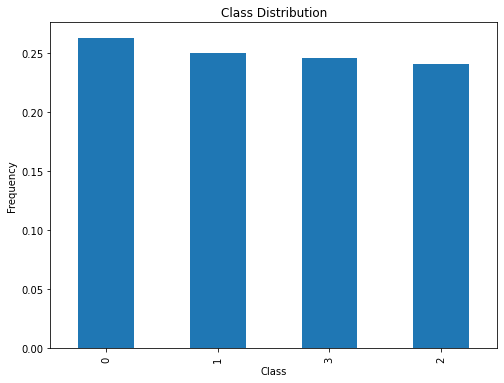

In [238]:
plt.figure(figsize=(8, 6))
(df['Class'].value_counts()/df.shape[0]).plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')

plt.show()

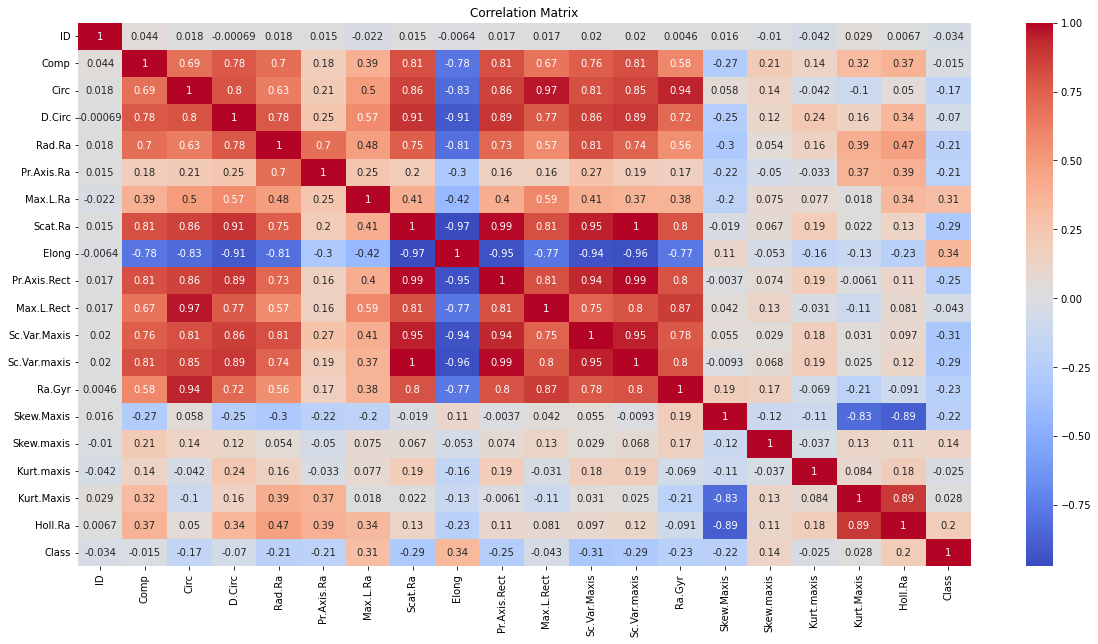

In [239]:
corr = df.corr()

# Plot correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Almost all the variable is not that correlated hence we can't use logistic regression

In [244]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)  

SS=StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)


In [245]:
lr = LogisticRegression()

In [215]:
#after scalling got some missing values, sensing there was some "0" in the data, those might becomes as missing values, hence imputing the missing values with knn 
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

In [250]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [252]:
lr.score(X_test,y_test)

0.7152777777777778

The Train score is 0.81, but the test score is 0.7, as we have seen the data as a first step the correlation score was not good. with the Target Class variable

<Axes: >

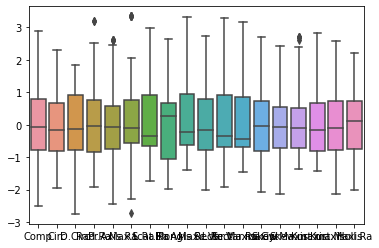

In [253]:
sns.boxplot(data=X_train_df)

In [255]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_pred_train = svm.predict(X_train)
test_accuracy = accuracy_score(y_test, y_pred)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on test data:", train_accuracy,test_accuracy)


Accuracy on test data: 0.8730434782608696 0.7569444444444444


In [257]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# define the hyperparameter grid
param_grid = {
    'n_estimators': [1, 2, 3, 4],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# create a Random Forest classifier object
rf = RandomForestClassifier(random_state=42)

# create a GridSearchCV object to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters found by GridSearchCV
print("Best hyperparameters:", grid_search.best_params_)

# get the best estimator from the GridSearchCV object
best_rf = grid_search.best_estimator_

# predict the classes of the test data using the best estimator
y_pred = best_rf.predict(X_test)

# calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Best hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 4}
Accuracy: 0.7638888888888888


In [258]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train the KNN classifier
k = 3  # number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the class labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6736111111111112
